<a href="https://colab.research.google.com/github/PaulinaWalasiewicz/Colab-notebooks/blob/main/ProjektMatematykaAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Magisterka sem2/Matematyka i Statystyka/Dane_Matematyka.csv')

In [ ]:
df

,Płeć,P,W,Ś,C,Pi,S,N,spalane kalorie,Zjazd,numer tygodnia,poczatek tyg (pon),koniec tyg (n)
0,K,NaN,NaN,NaN,NaN,NaN,NaN,6638,"252,244",nie,35,26.08.2024,01.09.2024
1,K,15455.0,11079.0,10896.0,10148.0,9939.0,9242.0,8172,"2847,378",nie,36,02.09.2024,08.09.2024
2,K,6619.0,5226.0,6896.0,2952.0,7080.0,6926.0,7608,"1645,666",nie,37,09.09.2024,15.09.2024
3,K,6372.0,4774.0,2863.0,2848.0,24614.0,7043.0,7838,"2141,376",nie,38,16.09.2024,22.09.2024
4,K,16308.0,9969.0,12561.0,6956.0,4196.0,8304.0,916,"2249,98",nie,39,23.09.2024,29.09.2024
5,K,8854.0,4184.0,7844.0,16306.0,4597.0,13395.0,701,"2123,478",nie,40,30.09.2024,06.10.2024
6,K,14810.0,7362.0,5372.0,18757.0,14824.0,22925.0,18659,"3902,942",tak,41,07.10.2024,13.10.2024
7,K,1516.0,7711.0,6049.0,5557.0,8753.0,13386.0,1006,"1671,164",nie,42,14.10.2024,20.10.2024
8,K,4686.0,12137.0,3570.0,8897.0,6079.0,26208.0,11133,"2762,98",tak,43,21.10.2024,27.10.2024
9,K,2912.0,1607.0,1592.0,8836.0,788.0,5078.0,781,"820,572",nie,44,28.10.2024,03.11.2024


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 1 to 19
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Płeć                19 non-null     object 
 1   P                   19 non-null     float64
 2   W                   19 non-null     float64
 3   Ś                   19 non-null     float64
 4   C                   19 non-null     float64
 5   Pi                  19 non-null     float64
 6   S                   19 non-null     float64
 7   N                   19 non-null     int64  
 8   spalane kalorie     19 non-null     object 
 9   Zjazd               19 non-null     object 
 10  numer tygodnia      19 non-null     int64  
 11  poczatek tyg (pon)  19 non-null     object 
 12  koniec tyg (n)      19 non-null     object 
dtypes: float64(6), int64(2), object(5)
memory usage: 2.1+ KB


In [ ]:
df['spalane kalorie'] = df['spalane kalorie'].str.replace(',', '.').astype(float)

In [ ]:
df

,Płeć,P,W,Ś,C,Pi,S,N,spalane kalorie,Zjazd,numer tygodnia,poczatek tyg (pon),koniec tyg (n)
1,K,15455.0,11079.0,10896.0,10148.0,9939.0,9242.0,8172,2847.378,nie,36,02.09.2024,08.09.2024
2,K,6619.0,5226.0,6896.0,2952.0,7080.0,6926.0,7608,1645.666,nie,37,09.09.2024,15.09.2024
3,K,6372.0,4774.0,2863.0,2848.0,24614.0,7043.0,7838,2141.376,nie,38,16.09.2024,22.09.2024
4,K,16308.0,9969.0,12561.0,6956.0,4196.0,8304.0,916,2249.980,nie,39,23.09.2024,29.09.2024
5,K,8854.0,4184.0,7844.0,16306.0,4597.0,13395.0,701,2123.478,nie,40,30.09.2024,06.10.2024
6,K,14810.0,7362.0,5372.0,18757.0,14824.0,22925.0,18659,3902.942,tak,41,07.10.2024,13.10.2024
7,K,1516.0,7711.0,6049.0,5557.0,8753.0,13386.0,1006,1671.164,nie,42,14.10.2024,20.10.2024
8,K,4686.0,12137.0,3570.0,8897.0,6079.0,26208.0,11133,2762.980,tak,43,21.10.2024,27.10.2024
9,K,2912.0,1607.0,1592.0,8836.0,788.0,5078.0,781,820.572,nie,44,28.10.2024,03.11.2024
10,K,7707.0,3989.0,2265.0,3222.0,10149.0,21249.0,6557,2095.244,tak,45,04.11.2024,10.11.2024


In [ ]:
# Suma kroków dla dni roboczych i weekendów
df['robocze_kroki'] = df[['P', 'W', 'Ś', 'C', 'Pi']].sum(axis=1)
df['weekend_kroki'] = df[['S', 'N']].sum(axis=1)
df['suma_kroki'] = df['robocze_kroki'] + df['weekend_kroki']

df

,Płeć,P,W,Ś,C,Pi,S,N,spalane kalorie,Zjazd,numer tygodnia,poczatek tyg (pon),koniec tyg (n),robocze_kroki,weekend_kroki,suma_kroki
1,K,15455.0,11079.0,10896.0,10148.0,9939.0,9242.0,8172,2847.378,nie,36,02.09.2024,08.09.2024,57517.0,17414.0,74931.0
2,K,6619.0,5226.0,6896.0,2952.0,7080.0,6926.0,7608,1645.666,nie,37,09.09.2024,15.09.2024,28773.0,14534.0,43307.0
3,K,6372.0,4774.0,2863.0,2848.0,24614.0,7043.0,7838,2141.376,nie,38,16.09.2024,22.09.2024,41471.0,14881.0,56352.0
4,K,16308.0,9969.0,12561.0,6956.0,4196.0,8304.0,916,2249.980,nie,39,23.09.2024,29.09.2024,49990.0,9220.0,59210.0
5,K,8854.0,4184.0,7844.0,16306.0,4597.0,13395.0,701,2123.478,nie,40,30.09.2024,06.10.2024,41785.0,14096.0,55881.0
6,K,14810.0,7362.0,5372.0,18757.0,14824.0,22925.0,18659,3902.942,tak,41,07.10.2024,13.10.2024,61125.0,41584.0,102709.0
7,K,1516.0,7711.0,6049.0,5557.0,8753.0,13386.0,1006,1671.164,nie,42,14.10.2024,20.10.2024,29586.0,14392.0,43978.0
8,K,4686.0,12137.0,3570.0,8897.0,6079.0,26208.0,11133,2762.980,tak,43,21.10.2024,27.10.2024,35369.0,37341.0,72710.0
9,K,2912.0,1607.0,1592.0,8836.0,788.0,5078.0,781,820.572,nie,44,28.10.2024,03.11.2024,15735.0,5859.0,21594.0
10,K,7707.0,3989.0,2265.0,3222.0,10149.0,21249.0,6557,2095.244,tak,45,04.11.2024,10.11.2024,27332.0,27806.0,55138.0


# Regresja Logistyczna

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
df_copy = df.copy()

In [ ]:
dni_data = pd.melt(
    df_copy[['P', 'W', 'Ś', 'C', 'Pi', 'S', 'N']],
    var_name='Dzien',
    value_name='Liczba_krokow'
)
dni_data['Czy_weekend'] = dni_data['Dzien'].apply(lambda x: 1 if x in ['S', 'N'] else 0)


In [ ]:
dni_data

,Dzien,Liczba_krokow,Czy_weekend
0,P,15455.0,0
1,P,6619.0,0
2,P,6372.0,0
3,P,16308.0,0
4,P,8854.0,0
...,...,...,...
128,N,8246.0,1
129,N,8569.0,1
130,N,1100.0,1
131,N,7157.0,1


In [ ]:
X = dni_data[['Liczba_krokow']]
y = dni_data['Czy_weekend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

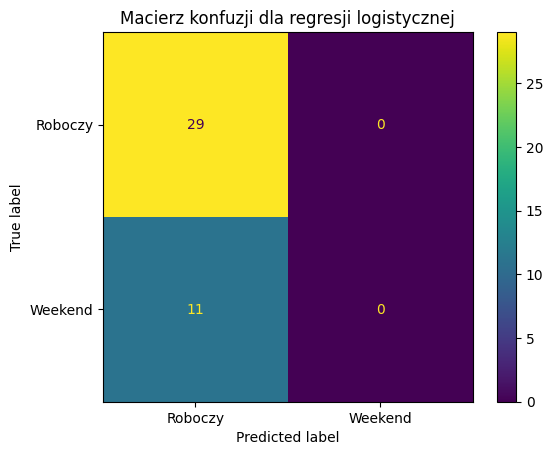

In [ ]:
y_pred = log_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=["Roboczy", "Weekend"]).plot()
plt.title("Macierz konfuzji dla regresji logistycznej")
plt.show()


In [ ]:
classification_rep = classification_report(y_test, y_pred, target_names=["Roboczy", "Weekend"])
print(classification_rep)

              precision    recall  f1-score   support

     Roboczy       0.72      1.00      0.84        29
     Weekend       0.00      0.00      0.00        11

    accuracy                           0.72        40
   macro avg       0.36      0.50      0.42        40
weighted avg       0.53      0.72      0.61        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model doskonale rozpoznał dni robocze na podstawie liczby kroków, jednak weekendy ani razu nie zostały rozpoznane. Problem może wynikać z nierównoważnego rozkładu klas. Aby poprawić wyniki spróbuje wykonać undersampling dni roboczych co powinno zredukować dysproporcje

In [ ]:
from sklearn.utils import resample

data_balancing = pd.concat([X, y], axis=1)

# Podział na klasy
robocze = data_balancing[data_balancing['Czy_weekend'] == 0]
weekendy = data_balancing[data_balancing['Czy_weekend'] == 1]



In [ ]:
# Podpróbkowanie dni roboczych do liczby dni weekendowych
robocze_downsampled = resample(robocze,
                               replace=False,  # Bez powtórzeń
                               n_samples=len(weekendy),  # Liczba próbek jak w weekendach
                               random_state=42)

balanced_data = pd.concat([robocze_downsampled, weekendy])
balanced_data

,Liczba_krokow,Czy_weekend
68,8198.0,0
22,9969.0,0
72,4680.0,0
73,12056.0,0
0,15455.0,0
...,...,...
128,8246.0,1
129,8569.0,1
130,1100.0,1
131,7157.0,1


In [ ]:
X_balanced = balanced_data[['Liczba_krokow']]
y_balanced = balanced_data['Czy_weekend']

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

log_reg_balanced = LogisticRegression()
log_reg_balanced.fit(X_train_balanced, y_train_balanced)

y_pred_balanced = log_reg_balanced.predict(X_test_balanced)



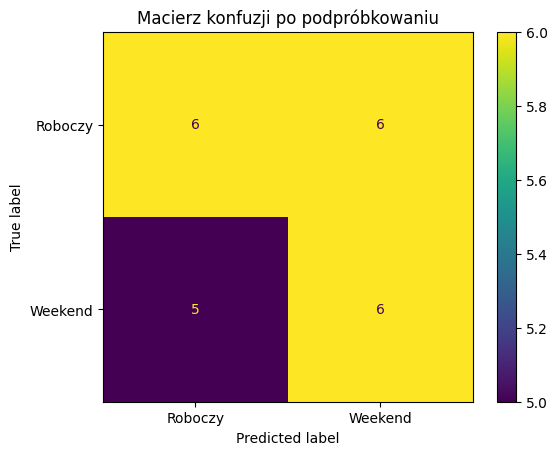

              precision    recall  f1-score   support

     Roboczy       0.55      0.50      0.52        12
     Weekend       0.50      0.55      0.52        11

    accuracy                           0.52        23
   macro avg       0.52      0.52      0.52        23
weighted avg       0.52      0.52      0.52        23



In [ ]:
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
ConfusionMatrixDisplay(conf_matrix_balanced, display_labels=["Roboczy", "Weekend"]).plot()
plt.title("Macierz konfuzji po podpróbkowaniu")
plt.show()

classification_rep_balanced = classification_report(y_test_balanced, y_pred_balanced, target_names=["Roboczy", "Weekend"])
print(classification_rep_balanced)

Podpróbkowanie poprawiło równowagę klasyfikacji między dniami roboczymi a weekendami, co doprowadziło do zbliżonych wartości precyzji, recall i f1-score dla obu klas (około 0.50–0.55). Jadnak, liczba kroków jako jedyna cecha okazała się niewystarczająca do skutecznego rozróżniania tych dni.

# K-średniach (klasteryzacja)
Celem jest segmentacja  tygodni na podstawie:


*   Średniej liczby kroków w dni robocze
*   Średniej liczby kroków w weekendy

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


df_copy_2 = df.copy()

In [ ]:
X_tygodnie = df_copy_2[['P', 'W', 'Ś', 'C', 'Pi', 'S', 'N']]

kmeans_tygodnie = KMeans(n_clusters=3, random_state=42)
df_copy_2['cluster'] = kmeans_tygodnie.fit_predict(X_tygodnie)


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tygodnie)

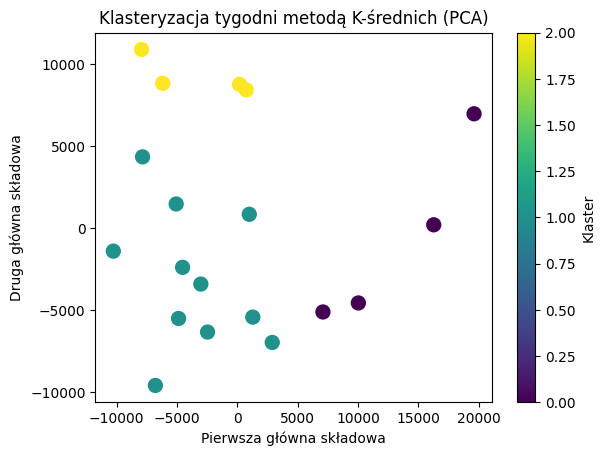

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_copy_2['cluster'], cmap='viridis', s=100)
plt.title("Klasteryzacja tygodni metodą K-średnich (PCA)")
plt.xlabel("Pierwsza główna składowa")
plt.ylabel("Druga główna składowa")
plt.colorbar(label='Klaster')
plt.show()

In [ ]:
centroids = kmeans_tygodnie.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=['P', 'W', 'Ś', 'C', 'Pi', 'S', 'N'])
print("Centroidy klastrów (średnia liczba kroków):")
print(centroids_df)

Centroidy klastrów (średnia liczba kroków):
              P             W         Ś            C           Pi  \
0   7616.750000   7019.000000   3836.50  9768.500000  8907.500000   
1   7619.727273   4827.545455   5569.00  6975.181818  6848.363636   
2  14716.750000  12022.500000  12612.75  8177.750000  6059.500000   

              S             N  
0  21717.500000  11737.500000  
1   6445.727273   4928.363636  
2   8890.500000   4480.250000  


Uzyskany podział obrazuje następujące grupy:
* Klaster 0 - Tygodnie z dominmującą aktywnością w weeekndy
* Klaster 1 - Tygodnie o równomiernej aktywności w weekendy i w dni robocze
* Klaster 2 - Tygodnie z dominującą aktywnoscia w dni robocze


In [ ]:
# Wypisanie dat tygodni przypisanych do klastra 0
dates_cluster_0 = df_copy_2[df_copy_2['cluster'] == 0]

dates_cluster_0

,Płeć,P,W,Ś,C,Pi,S,N,spalane kalorie,Zjazd,numer tygodnia,poczatek tyg (pon),koniec tyg (n),robocze_kroki,weekend_kroki,suma_kroki,cluster
6,K,14810.0,7362.0,5372.0,18757.0,14824.0,22925.0,18659,3902.942,tak,41,07.10.2024,13.10.2024,61125.0,41584.0,102709.0,0
8,K,4686.0,12137.0,3570.0,8897.0,6079.0,26208.0,11133,2762.980,tak,43,21.10.2024,27.10.2024,35369.0,37341.0,72710.0,0
10,K,7707.0,3989.0,2265.0,3222.0,10149.0,21249.0,6557,2095.244,tak,45,04.11.2024,10.11.2024,27332.0,27806.0,55138.0,0
12,K,3264.0,4588.0,4139.0,8198.0,4578.0,16488.0,10601,1970.528,tak,47,18.11.2024,24.11.2024,24767.0,27089.0,51856.0,0


Ciekawostka: Tygodnie z klastra 0, które charakteryzują się wysoką aktywnością w weekendy, to cztery pierwsze zjazdy w tym semestrze. Można zauważyć, że wtedy pogoda była jeszcze w miarę ładna, więc często chodziłam podczas zjazdów na długie spacery po Warszawie. 😊

# Testowanie hipotez statystycznych
Hipoteza do sprawdzenia:

* H₀ (hipoteza zerowa): Średnia liczba kroków w weekendy zjazdowe jest taka sama, jak w weekendy niezjazdowe.
* H₁ (hipoteza alternatywna): Średnia liczba kroków w weekendy zjazdowe różni się istotnie od średniej w weekendy niezjazdowe.

In [ ]:
from scipy.stats import ttest_ind

df_copy3 = df.copy(0)

In [ ]:
zjazdowe_kroki = df_copy3[df_copy3['Zjazd'] == 'tak']['weekend_kroki'] / 2  # Średnia w weekendy zjazdowe
niezjazdowe_kroki = df_copy3[df_copy3['Zjazd'] == 'nie']['weekend_kroki'] / 2  # Średnia w weekendy niezjazdowe



In [ ]:
t_stat_zjazdy, p_value_zjazdy = ttest_ind(zjazdowe_kroki, niezjazdowe_kroki, alternative='greater')



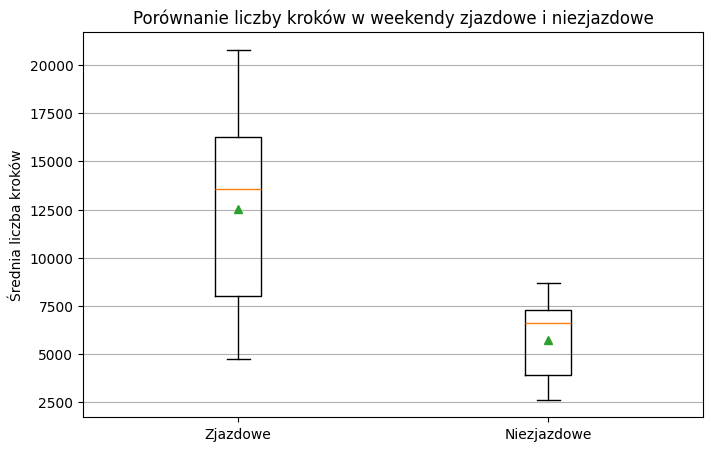

In [ ]:
plt.figure(figsize=(8, 5))
plt.boxplot([zjazdowe_kroki, niezjazdowe_kroki], labels=["Zjazdowe", "Niezjazdowe"], showmeans=True)
plt.title("Porównanie liczby kroków w weekendy zjazdowe i niezjazdowe")
plt.ylabel("Średnia liczba kroków")
plt.grid(axis='y')
plt.show()



In [ ]:
stat_summary_zjazdy = {
    "t-statystyka": t_stat_zjazdy,
    "p-wartość": p_value_zjazdy
}
stat_summary_zjazdy

{'t-statystyka': 3.559738296491227, 'p-wartość': 0.0012052891756019724}

Ponieważ p-wartość jest mniejsza niż poziom istotności (0.05), odrzucamy hipotezę zerową.

Weekendowe zjazdy miały statystycznie istotny wpływ na liczbę kroków. Wyniki wskazują na wyraźną różnicę między średnią liczbą kroków w weekendy zjazdowe i niezjazdowe, co sugeruje,że weekendy zjazdowe cechują się wyższą aktywnością fizyczną. Wykres pudełkowy dodatkowo ilustruje większe zróżnicowanie liczby kroków w weekendy zjazdowe.